In [1]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMAZON
2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMAZON
2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34185100,AMAZON
2024-04-25,169.679993,173.919998,166.320007,173.669998,173.669998,49249400,AMAZON
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON


In [4]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,181.113044,182.583874,179.748577,181.207352,180.822665,5.786622e+07
std,8.720951,8.568684,8.693710,8.683122,8.640117,1.761358e+07
min,164.889999,166.399994,164.080002,165.000000,164.909744,2.404830e+07
25%,173.320007,174.990005,172.050003,173.570007,173.229996,4.679290e+07
50%,180.089996,181.929993,178.330002,180.570007,179.859741,5.366560e+07
75%,189.259995,189.990005,187.610001,189.300003,188.850006,6.458890e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [5]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-05-01 to 2024-05-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


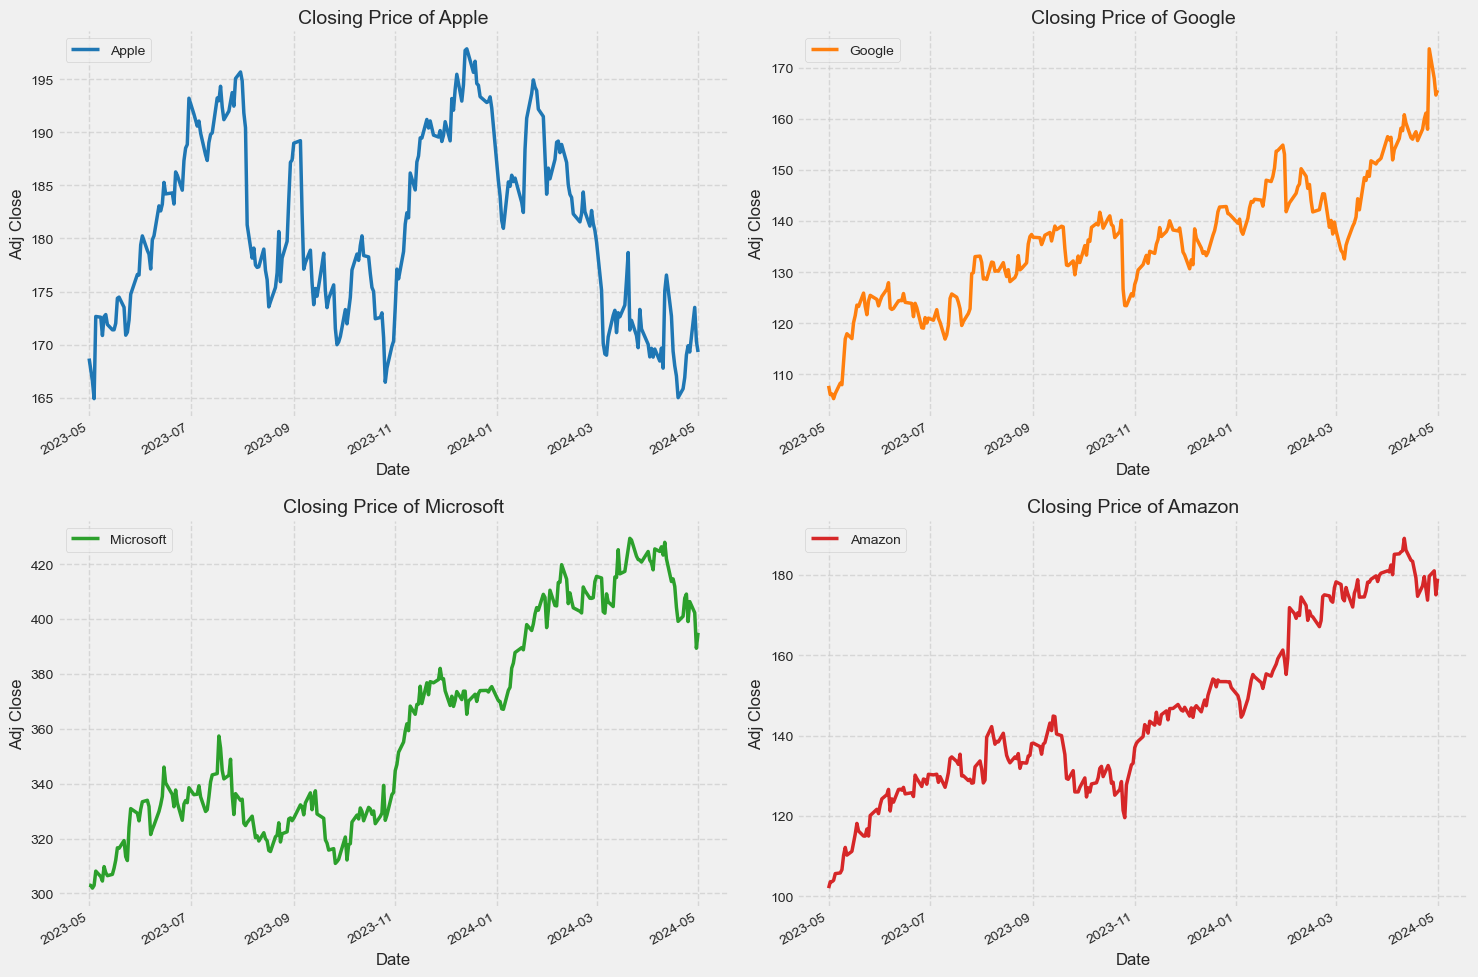

In [7]:
# Define a dictionary mapping ticker symbols to full names
company_names = {'AAPL': 'Apple', 'GOOG': 'Google', 'MSFT': 'Microsoft', 'AMZN': 'Amazon'}

# Define a color palette for the lines
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)
    company['Adj Close'].plot(color=colors[i-1], linestyle='-', linewidth=2.5)  # Set line style and width
    plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
    plt.ylabel('Adj Close', fontsize=12)  
    plt.xlabel('Date', fontsize=12)  # Add labels for x-axis and y-axis
    plt.title(f"Closing Price of {company_names[tech_list[i - 1]]}", fontsize=14)  # Add main title
    plt.xticks(fontsize=10)  # Adjust tick marks for readability
    plt.yticks(fontsize=10)
    plt.legend([company_names[tech_list[i - 1]]], loc='upper left', fontsize=10)  # Customize legend
    ax.spines['top'].set_visible(False)  # Hide top spine
    ax.spines['right'].set_visible(False)  # Hide right spine
    ax.spines['bottom'].set_linewidth(0.5)  # Set thickness of bottom spine
    ax.spines['left'].set_linewidth(0.5)  # Set thickness of left spine
    
plt.tight_layout()
plt.show()


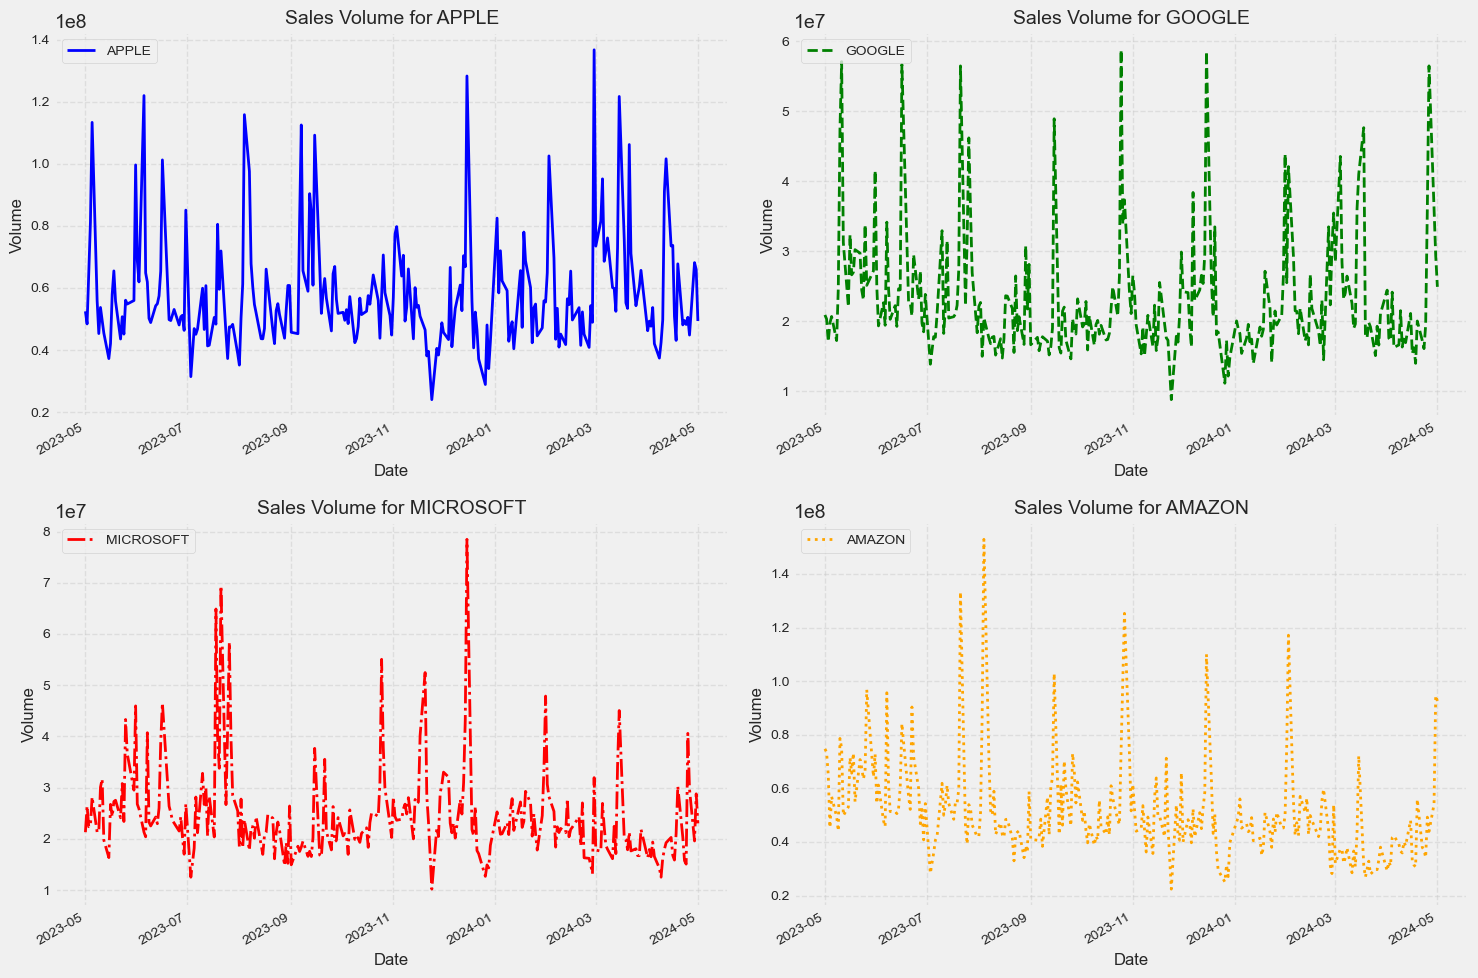

In [49]:
import matplotlib.pyplot as plt

# Define custom colors for each company
colors = ['blue', 'green', 'red', 'orange']

# Define custom line styles
line_styles = ['-', '--', '-.', ':']

# Plotting the total volume of stock being traded each day for each company
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color=colors[i-1], linestyle=line_styles[i-1], linewidth=2)  # Use custom colors and line styles
    plt.ylabel('Volume', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.title(f"Sales Volume for {company_name[i - 1]}", fontsize=14)  # Use full company names
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.legend([company_name[i - 1]], loc='upper left', fontsize=10)  # Customize legend
    plt.tight_layout()

plt.show()



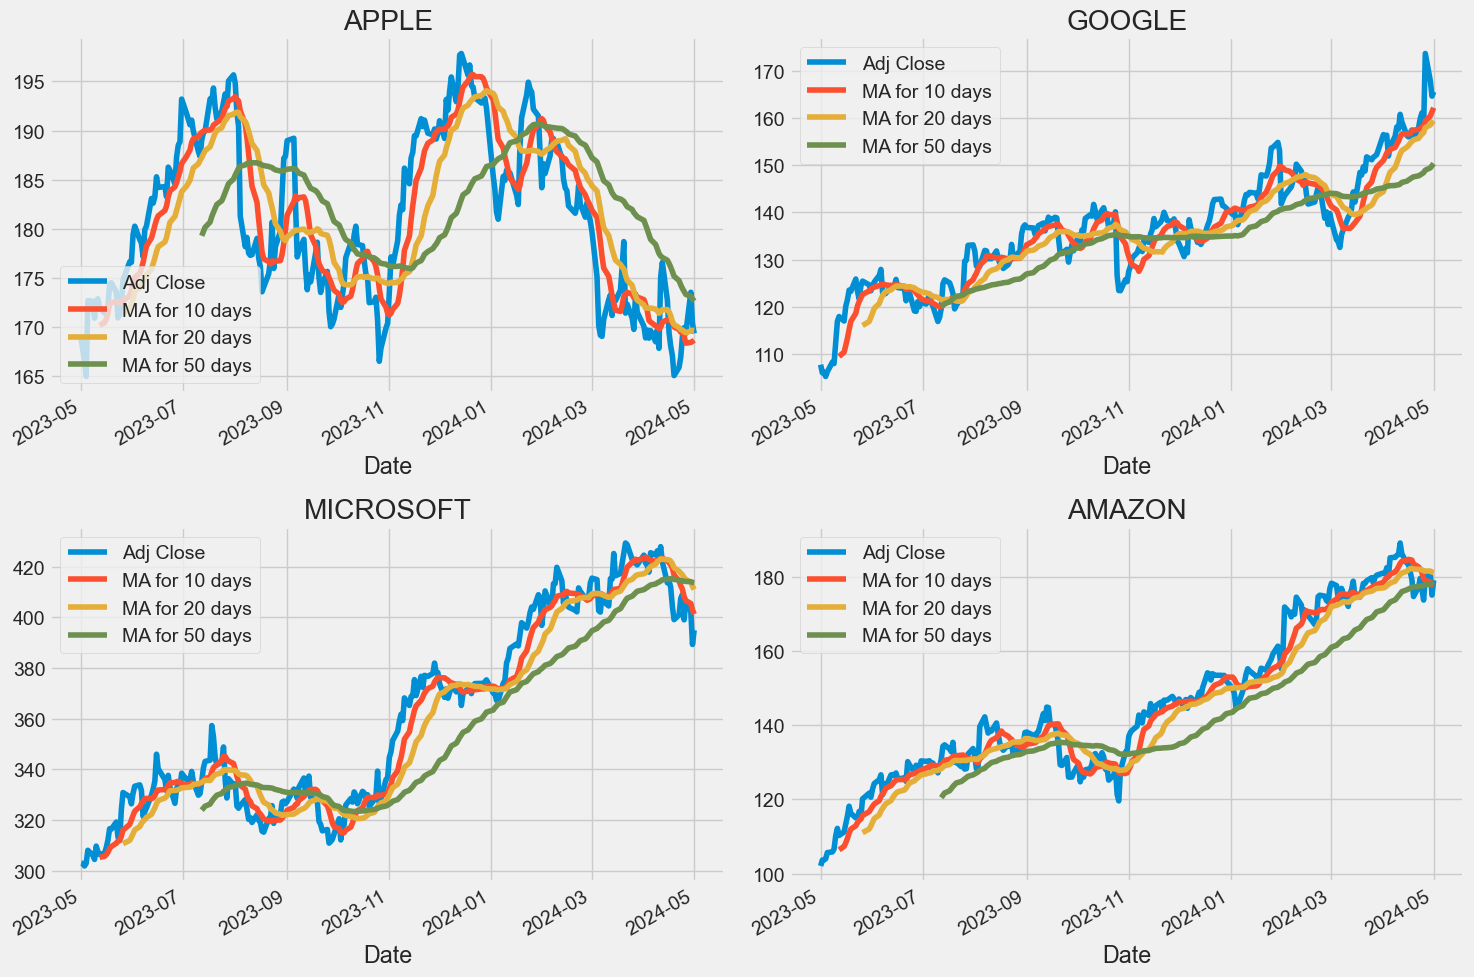

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [66]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# df = pd.read_csv('your_dataset.csv')

# Use the shape attribute to get the number of rows and columns
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 3102
Number of columns: 7


/var/folders/3b/8kbk72hn4k71sm4d5lq56vpm0000gn/T/ipykernel_2719/4175154962.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'], shade=True, color='skyblue')  # Use KDE plot instead of histogram
/var/folders/3b/8kbk72hn4k71sm4d5lq56vpm0000gn/T/ipykernel_2719/4175154962.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'], shade=True, color='skyblue')  # Use KDE plot instead of histogram
/var/folders/3b/8kbk72hn4k71sm4d5lq56vpm0000gn/T/ipykernel_2719/4175154962.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(company['Daily Return'], shade=True, color='skyblue')  # Use KDE 

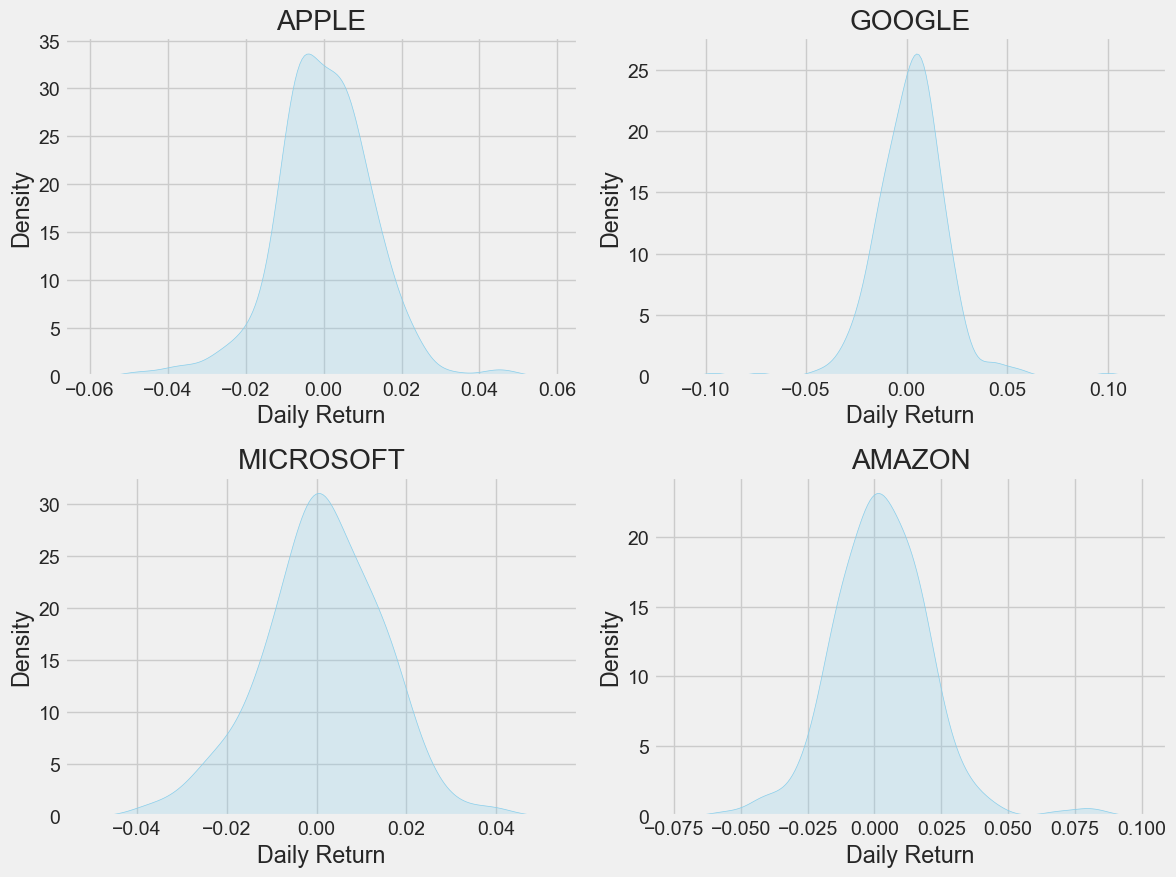

In [52]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(company['Daily Return'], shade=True, color='skyblue')  # Use KDE plot instead of histogram
    plt.xlabel('Daily Return')
    plt.ylabel('Density')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()
plt.show()


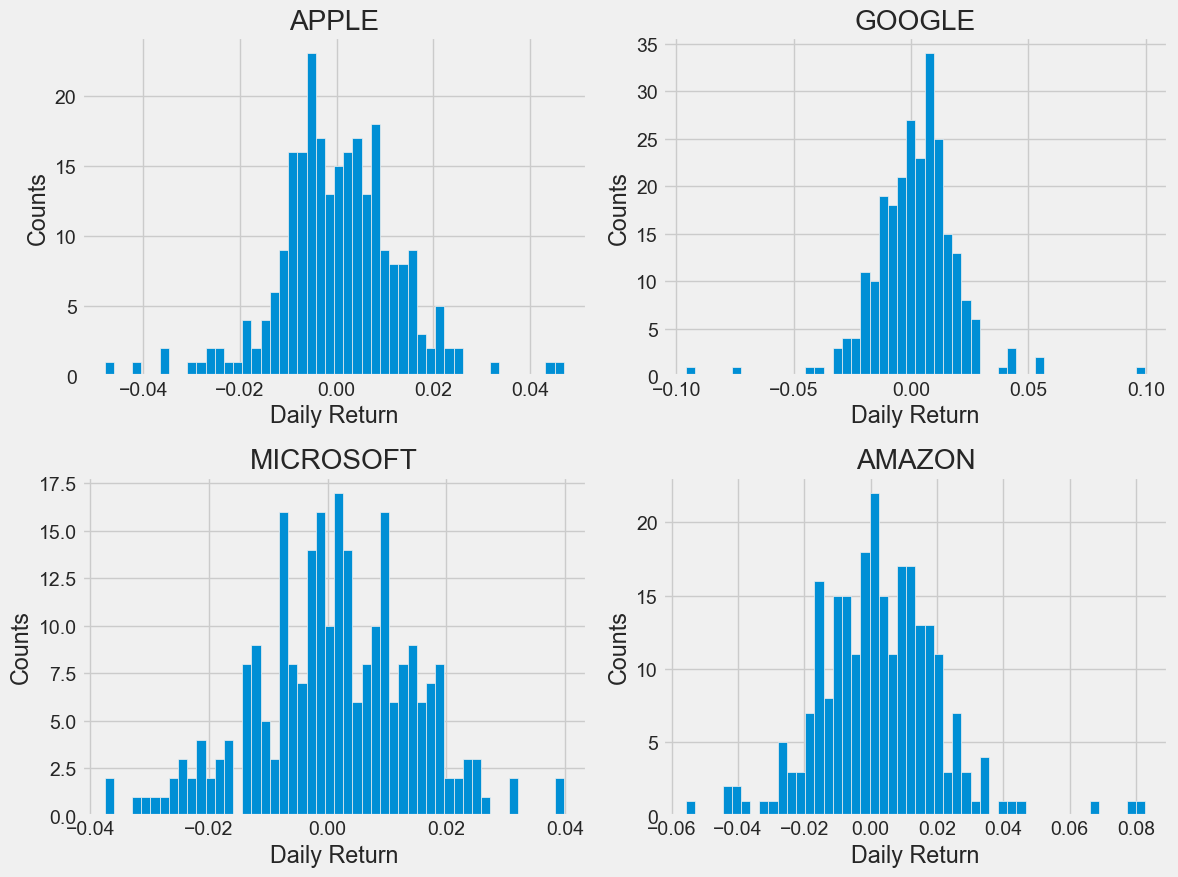

In [11]:
#######################

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-01,NaN,NaN,NaN,NaN
2023-05-02,-0.006191,0.015483,-0.016062,-0.000491
2023-05-03,-0.006467,0.000193,0.001321,-0.003307
2023-05-04,-0.009914,0.003377,-0.008575,0.003318
2023-05-05,0.046927,0.015962,0.009552,0.017157


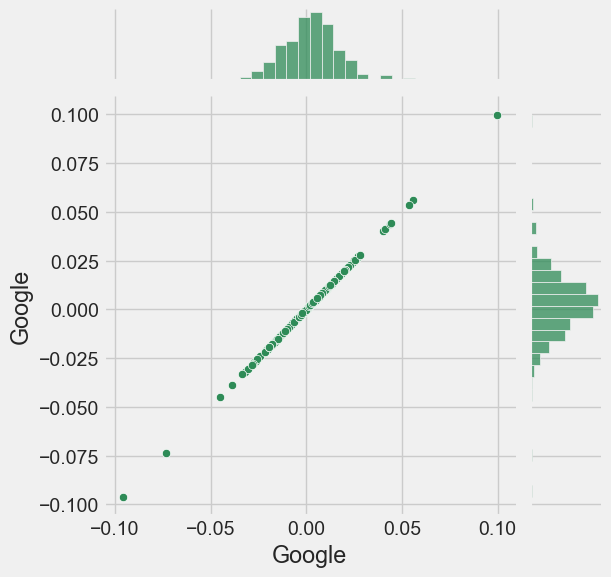

In [53]:
# Create a DataFrame with full company names
full_names = tech_rets.rename(columns={'GOOG': 'Google'})

# Plot the jointplot using the DataFrame with full names
sns.jointplot(x='Google', y='Google', data=full_names, kind='scatter', color='seagreen')


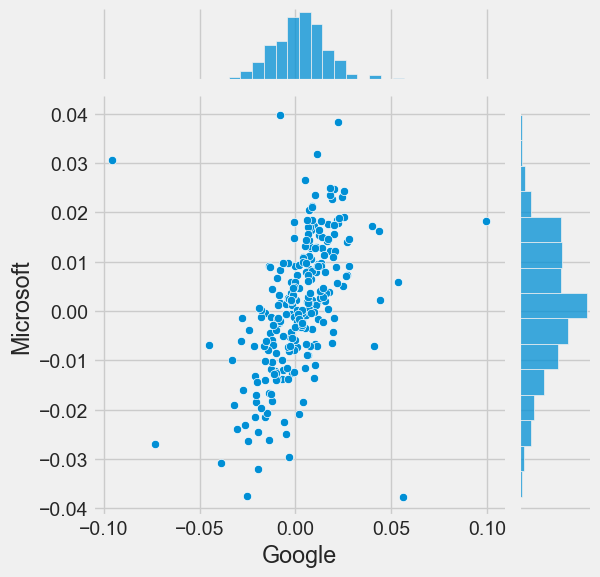

In [54]:
# Create a DataFrame with full company names
full_names = tech_rets.rename(columns={'GOOG': 'Google', 'MSFT': 'Microsoft'})

# Plot the jointplot using the DataFrame with full names
sns.jointplot(x='Google', y='Microsoft', data=full_names, kind='scatter')

/Users/anushasathravada/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/anushasathravada/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/anushasathravada/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/anushasathravada/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


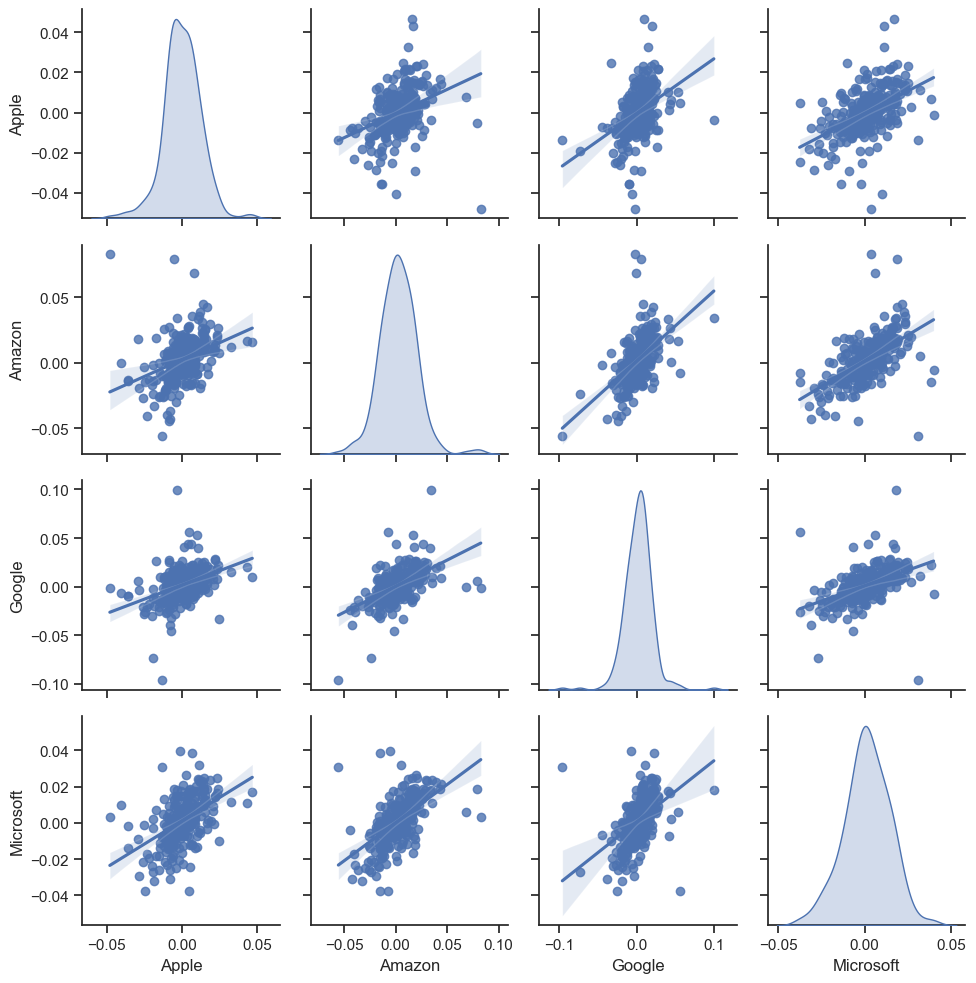

In [57]:
# Rename the column names
tech_rets_full_names.columns = ['Apple', 'Amazon', 'Google', 'Microsoft']

# Set style
sns.set(style="ticks", color_codes=True)

# Define custom colors
custom_colors = ['#1f77b4', '#ff7f0e']

# Plot the pairplot with customizations
sns.pairplot(tech_rets_full_names, kind='reg', diag_kind='kde', palette=custom_colors, markers='o')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



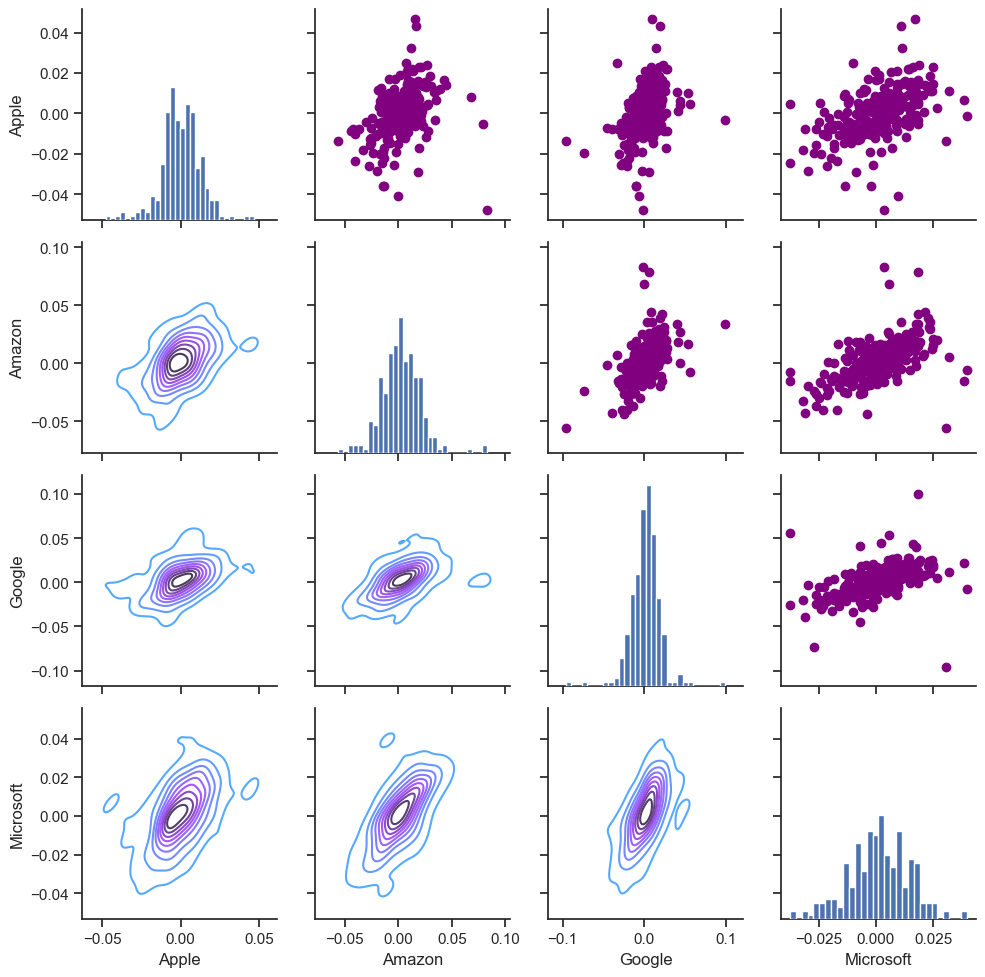

In [58]:
# Rename the column names
tech_rets_full_names.columns = ['Apple', 'Amazon', 'Google', 'Microsoft']

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets_full_names.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

# Show the plot
plt.show()


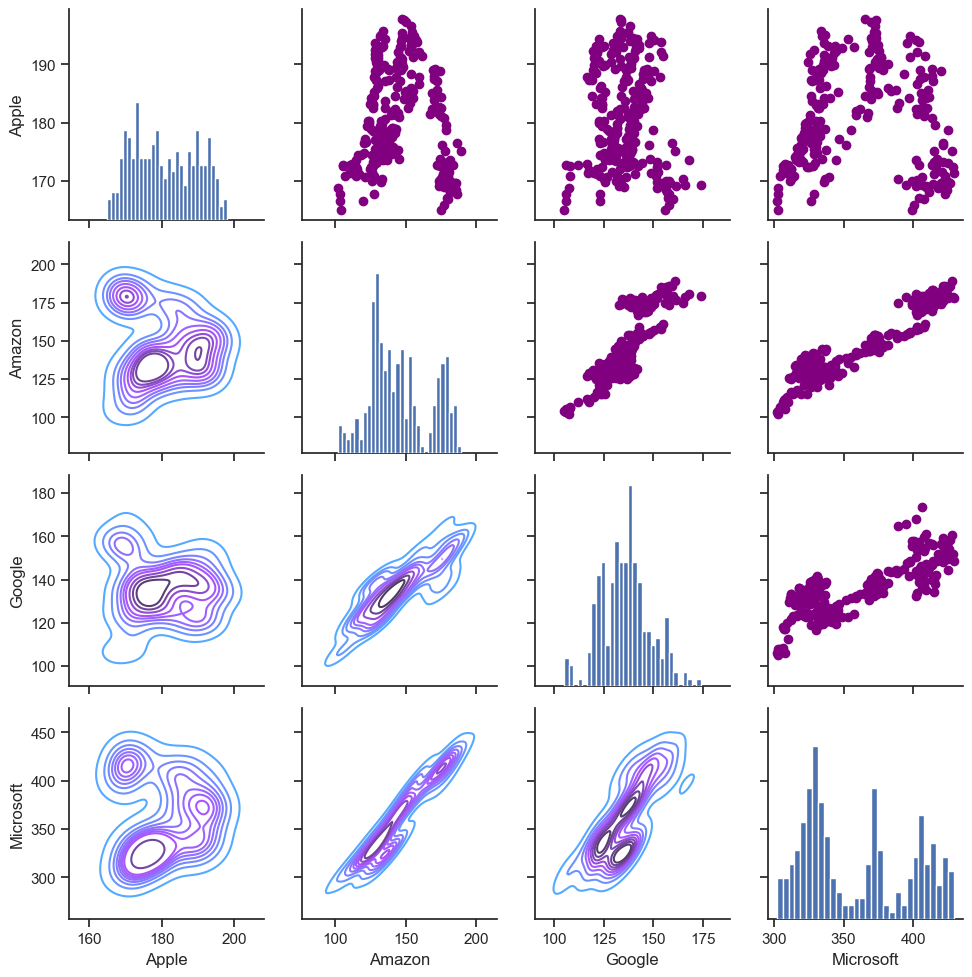

In [59]:
# Rename the column names
closing_df.columns = ['Apple', 'Amazon', 'Google', 'Microsoft']

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

# Show the plot
plt.show()



Text(0.5, 1.0, 'Correlation of stock closing price')

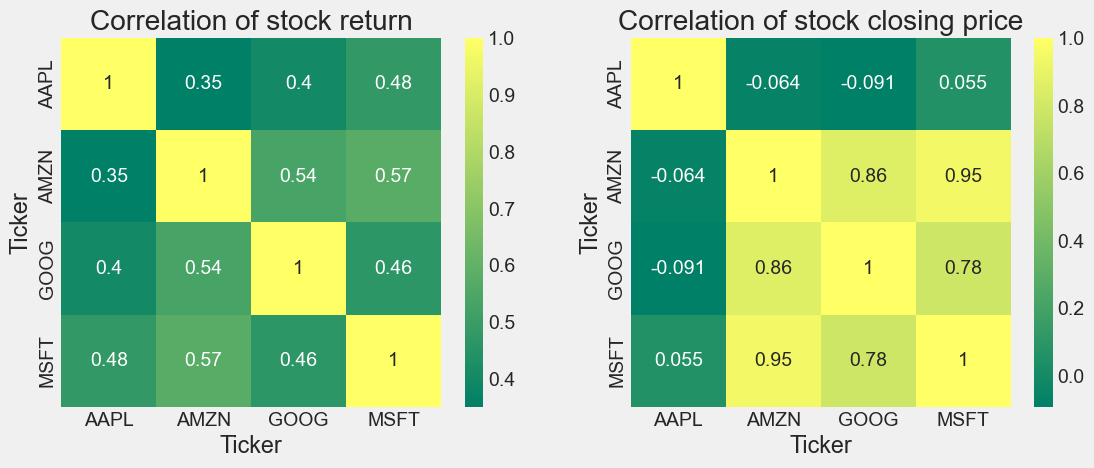

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

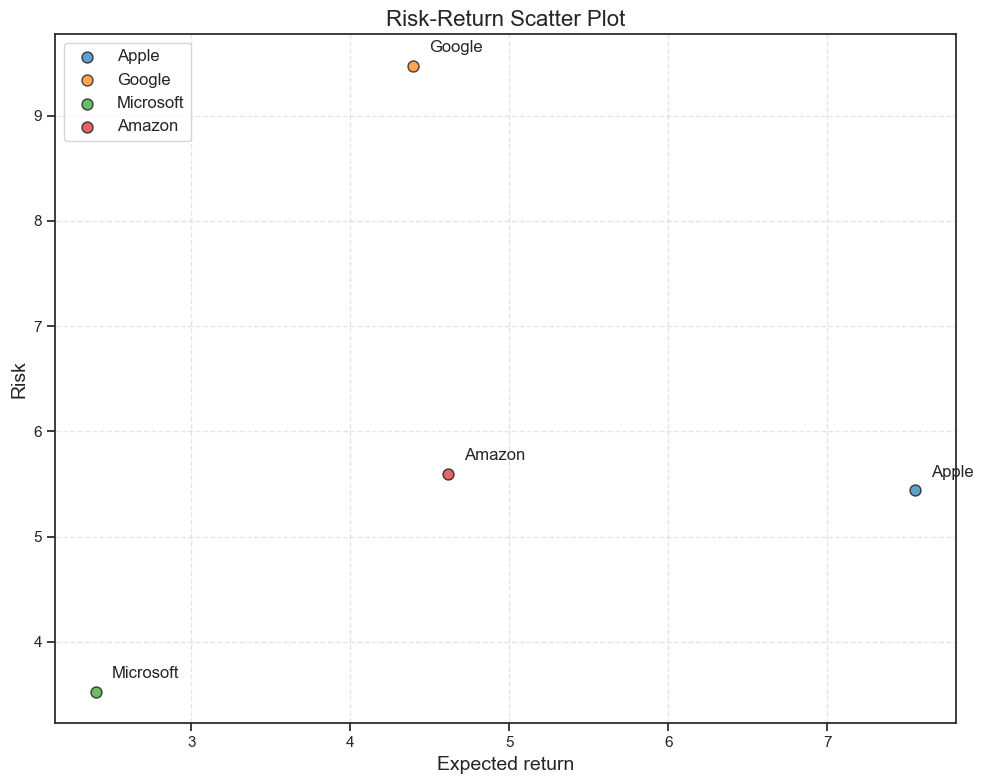

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for demonstration
rets = np.random.rand(4, 2) * 10
labels = ['Apple', 'Google', 'Microsoft', 'Amazon']

area = np.pi * 20

plt.figure(figsize=(10, 8))

# Define custom colors for each company
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Scatter plot with custom colors, markers, and labels
for i, (x, y) in enumerate(rets):
    plt.scatter(x, y, s=area, color=colors[i], alpha=0.7, label=labels[i], edgecolors='black')

# Add annotations with adjusted positions
for label, x, y in zip(labels, rets[:, 0], rets[:, 1]):
    plt.text(x + 0.1, y + 0.1, label, fontsize=12, ha='left', va='bottom')

plt.xlabel('Expected return', fontsize=14)
plt.ylabel('Risk', fontsize=14)
plt.title('Risk-Return Scatter Plot', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


In [20]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400
...,...,...,...,...,...,...
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.889999,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.300003,44838400
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400


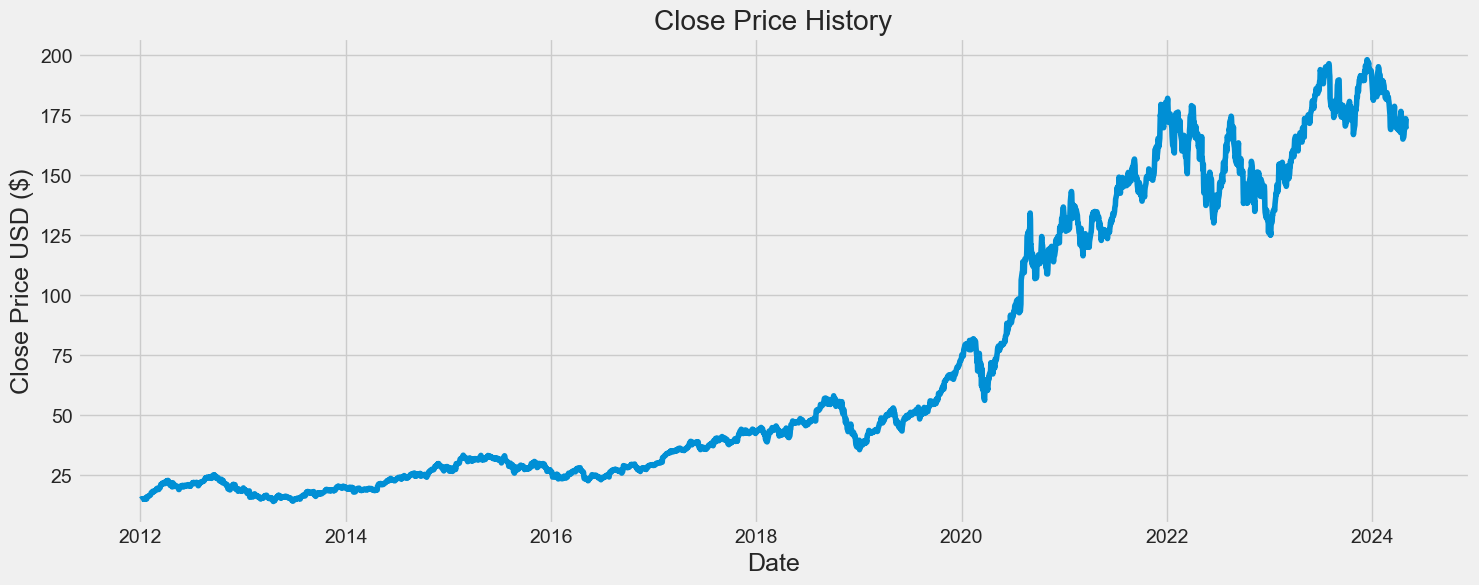

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

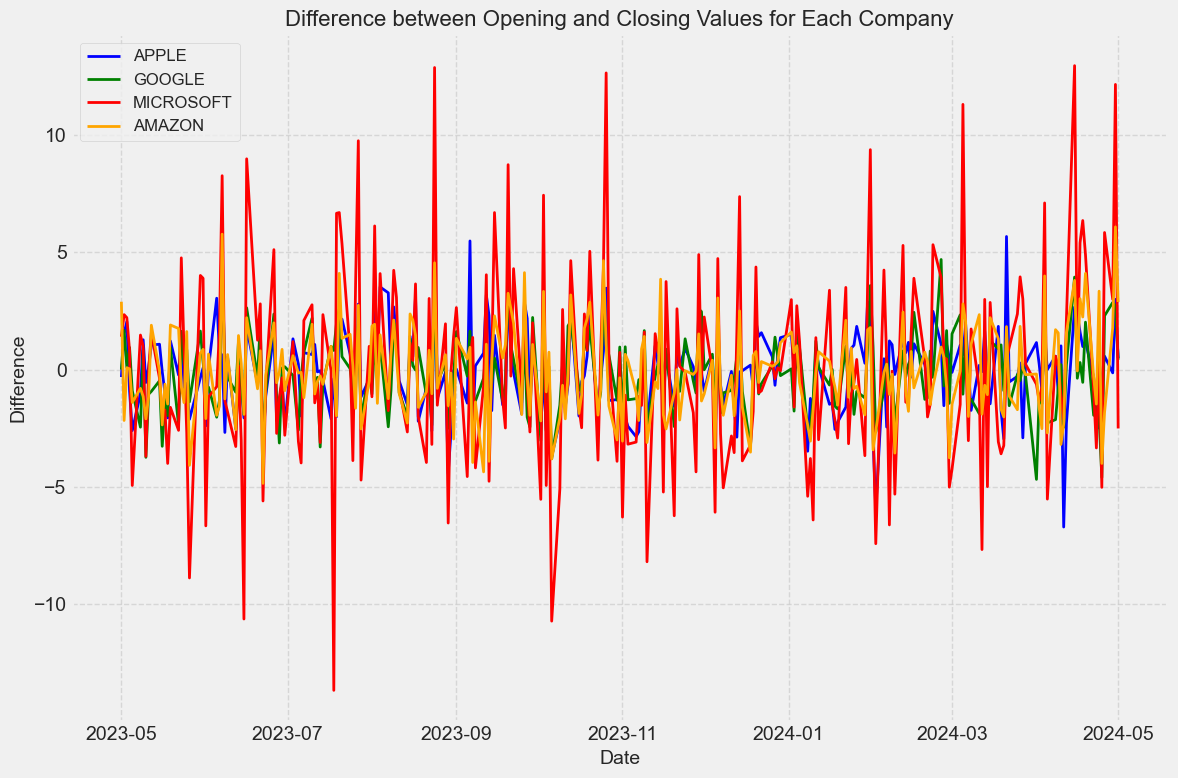

In [47]:
import matplotlib.pyplot as plt

# Define custom colors for each company
colors = ['blue', 'green', 'red', 'orange']

# Plotting the difference between opening and closing values for each company
plt.figure(figsize=(12, 8))

# Iterate over each company and plot the difference values with custom colors and line styles
for i, (company, com_name) in enumerate(zip(company_list, company_name)):
    plt.plot(company.index, company['Open'] - company['Close'], label=com_name, color=colors[i], linestyle='-', linewidth=2)

plt.title('Difference between Opening and Closing Values for Each Company', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2947

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.86636801],
       [0.84915497],
       [0.84356209]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Users/anushasathravada/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2887/2887 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - loss: 0.0059


In [26]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


12.586050414586682

/var/folders/3b/8kbk72hn4k71sm4d5lq56vpm0000gn/T/ipykernel_2719/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


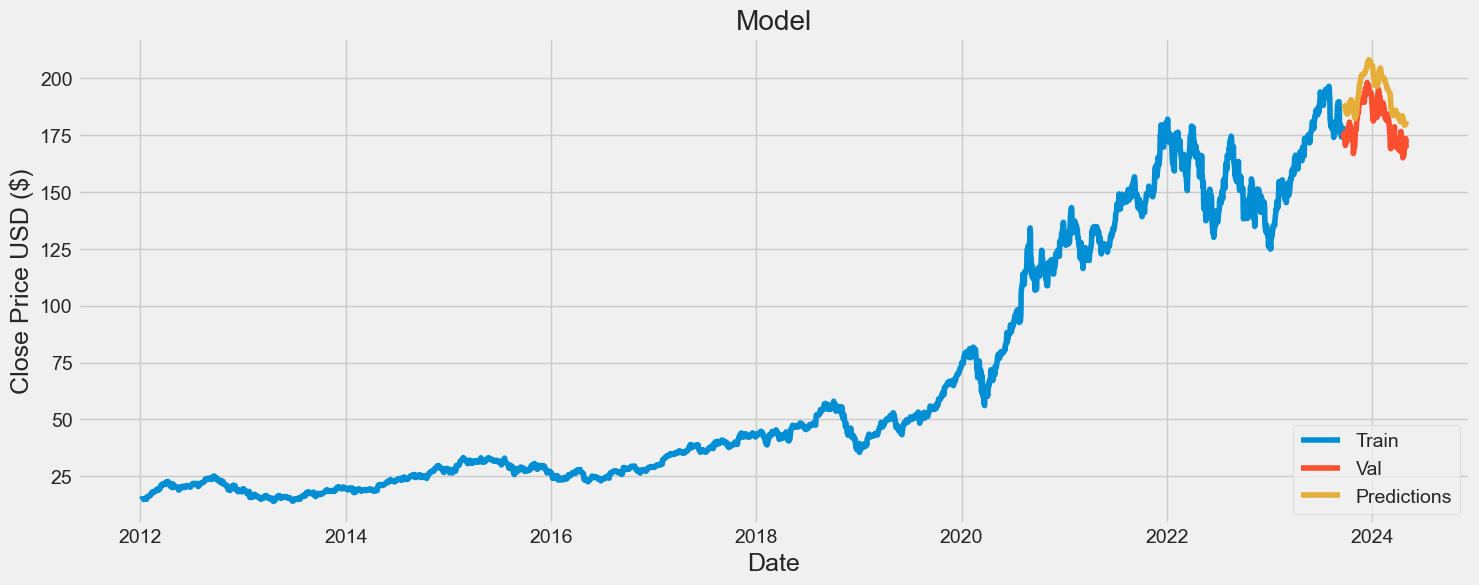

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-20,175.490005,188.754303
2023-09-21,173.929993,188.577911
2023-09-22,174.789993,188.162033
2023-09-25,176.080002,187.786209
2023-09-26,171.960007,187.622437
...,...,...
2024-04-25,169.889999,179.374985
2024-04-26,169.300003,179.512115
2024-04-29,173.500000,179.756577
